In [1]:
pip install streamlit pandas scikit-learn matplotlib seaborn


     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 44.3/44.3 kB 2.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 10.1/10.1 MB 62.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 6.9/6.9 MB 81.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 79.1/79.1 kB 6.2 MB/s eta 0:00:00


2025-07-09 10:38:58.460 WARNING streamlit.runtime.caching.cache_data_api: No runtime found, using MemoryCacheStorageManager
2025-07-09 10:38:58.472 WARNING streamlit.runtime.caching.cache_data_api: No runtime found, using MemoryCacheStorageManager
2025-07-09 10:38:58.481 WARNING streamlit.runtime.scriptrunner_utils.script_run_context: Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-07-09 10:38:59.005 
  command:

    streamlit run /usr/local/lib/python3.11/dist-packages/colab_kernel_launcher.py [ARGUMENTS]
2025-07-09 10:38:59.008 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-07-09 10:38:59.012 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-07-09 10:38:59.016 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-07-09 10:38:59.043 Thread 'MainThread': missin

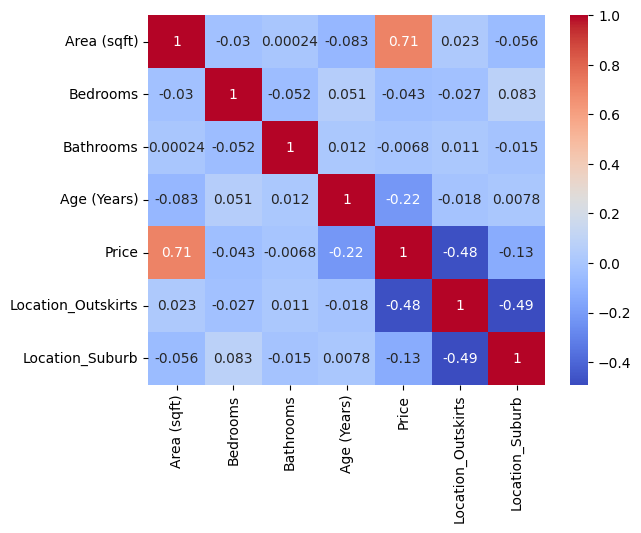

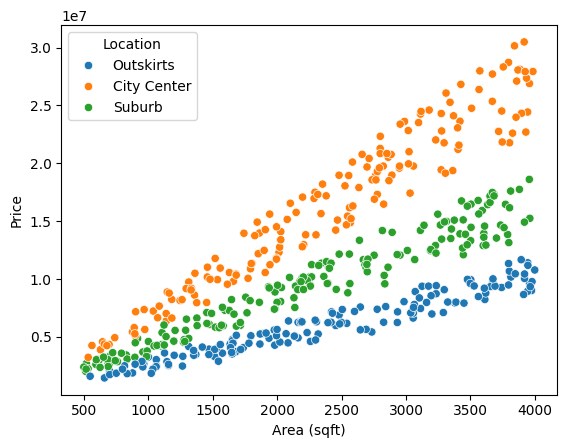

In [2]:
import streamlit as st
import pandas as pd
import numpy as np
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score
import matplotlib.pyplot as plt
import seaborn as sns

# Sample synthetic real estate dataset
@st.cache_data
def load_data():
    np.random.seed(42)
    size = 500
    data = {
        'Area (sqft)': np.random.randint(500, 4000, size),
        'Bedrooms': np.random.randint(1, 6, size),
        'Bathrooms': np.random.randint(1, 4, size),
        'Age (Years)': np.random.randint(0, 30, size),
        'Location': np.random.choice(['City Center', 'Suburb', 'Outskirts'], size),
    }
    df = pd.DataFrame(data)
    # Assign base prices
    location_price_map = {'City Center': 8000, 'Suburb': 5000, 'Outskirts': 3000}
    df['Price'] = df['Area (sqft)'] * df['Location'].map(location_price_map) * (1 - df['Age (Years)'] * 0.01)
    df['Price'] += np.random.randint(-500000, 500000, size)
    return df

# Load and preprocess data
df = load_data()
df_encoded = pd.get_dummies(df, drop_first=True)

# Train-test split
X = df_encoded.drop("Price", axis=1)
y = df_encoded["Price"]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train model
model = LinearRegression()
model.fit(X_train, y_train)
y_pred = model.predict(X_test)

# Streamlit UI
st.title("🏠 Real Estate Price Prediction Dashboard")
st.write("Use this dashboard to predict real estate prices based on input features.")

# Sidebar - user input
st.sidebar.header("Enter Property Details:")
area = st.sidebar.slider("Area (sqft)", 500, 4000, 1000)
bedrooms = st.sidebar.selectbox("Bedrooms", [1, 2, 3, 4, 5])
bathrooms = st.sidebar.selectbox("Bathrooms", [1, 2, 3])
age = st.sidebar.slider("Age (Years)", 0, 30, 5)
location = st.sidebar.selectbox("Location", ['City Center', 'Suburb', 'Outskirts'])

# Predict button
if st.sidebar.button("Predict Price"):
    input_data = pd.DataFrame({
        'Area (sqft)': [area],
        'Bedrooms': [bedrooms],
        'Bathrooms': [bathrooms],
        'Age (Years)': [age],
        'Location_Suburb': [1 if location == 'Suburb' else 0],
        'Location_Outskirts': [1 if location == 'Outskirts' else 0]
    })

    predicted_price = model.predict(input_data)[0]
    st.subheader("💰 Estimated Price:")
    st.success(f"₹ {predicted_price:,.0f}")

# Metrics
st.markdown("---")
st.subheader("📊 Model Performance")
st.write(f"R² Score: **{r2_score(y_test, y_pred):.4f}**")

# Data Visualization
st.markdown("---")
st.subheader("📈 Data Insights")

tab1, tab2 = st.tabs(["Heatmap", "Price vs Area"])
with tab1:
    st.write("Feature correlation heatmap:")
    fig, ax = plt.subplots()
    sns.heatmap(df_encoded.corr(), annot=True, cmap="coolwarm", ax=ax)
    st.pyplot(fig)

with tab2:
    st.write("Price vs Area scatterplot:")
    fig2, ax2 = plt.subplots()
    sns.scatterplot(data=df, x='Area (sqft)', y='Price', hue='Location', ax=ax2)
    st.pyplot(fig2)

# Option to show raw data
if st.checkbox("Show Raw Data"):
    st.write(df.head(20))
